# Overview

In this project, I create a Logistic Regression model that predicts which passengers survived the sinking of the Titanic based on features like age and class. The data we will be using for training our model is provided by Kaggle.

## The Set Up

In [ ]:
# Mount the drive for file upload
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

The data from kaggle comes presorted into a training set and a testing set (which is left untouched until the very end). We still need to split the training set into a training and validation set. Let's first see what type of data we are working with. 

In [ ]:
location = "/content/drive/My Drive/Colab Notebooks/Codacademy Machine Learning/Logistic Regression/titanic/"
training_set = "/content/drive/My Drive/Colab Notebooks/Codacademy Machine Learning/Logistic Regression/titanic/train.csv"
test_set = "/content/drive/My Drive/Colab Notebooks/Codacademy Machine Learning/Logistic Regression/titanic/test.csv"

In [ ]:
passengers = pd.read_csv(training_set)
print(passengers.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [ ]:
print(passengers.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


It seems we're using features like passenger class, sex, and other stuff to determine survivability. 

## Cleaning the Data

In history class, we learned that the safety of women and children on the Titanic were prioritized. Perhaps Sex and Age are good features to predict one's survival. Let's update the Sex column such that the text values become numerical values: 'male' maps to '0' and 'female' maps to '1'. This makes our analysis easier. 

In [ ]:
print(passengers['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


In [ ]:
passengers['Sex'] = passengers['Sex'].map({'male':'0', 'female':'1'})

In [ ]:
print(passengers['Sex'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object


Great! The column of 'Sex' is cleaned. Next, we should clean the 'age' column because if we take a look at the age column, we see that some values are Nan. Let's clean this by filling in all the empty Age values with the mean age. 

In [ ]:
print(passengers['Age'].values)  # .values isolates only the values of the column of interest

[22.   38.   26.   35.   35.     nan 54.    2.   27.   14.    4.   58.
 20.   39.   14.   55.    2.     nan 31.     nan 35.   34.   15.   28.
  8.   38.     nan 19.     nan   nan 40.     nan   nan 66.   28.   42.
   nan 21.   18.   14.   40.   27.     nan  3.   19.     nan   nan   nan
   nan 18.    7.   21.   49.   29.   65.     nan 21.   28.5   5.   11.
 22.   38.   45.    4.     nan   nan 29.   19.   17.   26.   32.   16.
 21.   26.   32.   25.     nan   nan  0.83 30.   22.   29.     nan 28.
 17.   33.   16.     nan 23.   24.   29.   20.   46.   26.   59.     nan
 71.   23.   34.   34.   28.     nan 21.   33.   37.   28.   21.     nan
 38.     nan 47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.
 21.     nan 32.5  32.5  54.   12.     nan 24.     nan 45.   33.   20.
 47.   29.   25.   23.   19.   37.   16.   24.     nan 22.   24.   19.
 18.   19.   27.    9.   36.5  42.   51.   22.   55.5  40.5    nan 51.
 16.   30.     nan   nan 44.   40.   26.   17.    1.    9.     nan 45.


In [ ]:
print(passengers['Age'].describe())   # Gives us the characteristics of the values in the column

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


From the line above, we can see that the mean age is around 30. We can fill in nan with the mean age via:

In [ ]:
passengers['Age'].fillna(value = 30, inplace=True)

In [ ]:
print(passengers['Age'].values)

[22.   38.   26.   35.   35.   30.   54.    2.   27.   14.    4.   58.
 20.   39.   14.   55.    2.   30.   31.   30.   35.   34.   15.   28.
  8.   38.   30.   19.   30.   30.   40.   30.   30.   66.   28.   42.
 30.   21.   18.   14.   40.   27.   30.    3.   19.   30.   30.   30.
 30.   18.    7.   21.   49.   29.   65.   30.   21.   28.5   5.   11.
 22.   38.   45.    4.   30.   30.   29.   19.   17.   26.   32.   16.
 21.   26.   32.   25.   30.   30.    0.83 30.   22.   29.   30.   28.
 17.   33.   16.   30.   23.   24.   29.   20.   46.   26.   59.   30.
 71.   23.   34.   34.   28.   30.   21.   33.   37.   28.   21.   30.
 38.   30.   47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.
 21.   30.   32.5  32.5  54.   12.   30.   24.   30.   45.   33.   20.
 47.   29.   25.   23.   19.   37.   16.   24.   30.   22.   24.   19.
 18.   19.   27.    9.   36.5  42.   51.   22.   55.5  40.5  30.   51.
 16.   30.   30.   30.   44.   40.   26.   17.    1.    9.   30.   45.
 30.  

Great! There are no more Nan values.

The class of the passengers is also known to have contributed to their survival rate. Let's create a new column named FirstClass that stores 1 for all passengers in first class and 0 for all other passengers. We can do this via:

In [ ]:
passengers['FirstClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 1 else 0)


Now let's create a new column named SecondClass that stores 1 for all passengers in second class and 0 for all other passengers.

In [ ]:
passengers['SecondClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 2 else 0)

In [ ]:
print(passengers)

     PassengerId  Survived  Pclass  ... Embarked FirstClass  SecondClass
0              1         0       3  ...        S          0            0
1              2         1       1  ...        C          1            0
2              3         1       3  ...        S          0            0
3              4         1       1  ...        S          1            0
4              5         0       3  ...        S          0            0
..           ...       ...     ...  ...      ...        ...          ...
886          887         0       2  ...        S          0            1
887          888         1       1  ...        S          1            0
888          889         0       3  ...        S          0            0
889          890         1       1  ...        C          1            0
890          891         0       3  ...        Q          0            0

[891 rows x 14 columns]


As we can see, we have created 2 new features at the end of our original table: FirstClass and SecondClass.

Great! Now that we've got the features we want to use, let's put them all together into one variable. Don't forget, we also need the labels (of whether someone survived or not), so we need the column 'Survived' as another variable. We can do this via: 

In [ ]:
features = passengers[['Sex','Age','FirstClass','SecondClass']] # features...
survival = passengers['Survived']  # labels...

### Splitting the Data

Let's use Sklearn's built in function to accomplish the splitting.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(features, survival, train_size = 0.8, test_size = 0.2, random_state = 1) 

Note: I chose test data to be validation because that's what it should be..

### Normalization

It's always a good idea when working with data of different magnitudes to normalize the data. Plus, sklearn's logistics regression implementation uses Regularization, so we need to normalize. To do so, we can use a function from sklearn.preprocessing called StandardScaler.

In [ ]:
scaler = StandardScaler()

train_features = scaler.fit_transform(X_train)
val_features = scaler.transform(X_val)

### Creating and Evaluating the Model with Sklearn

Fitting the model will perform gradient descent to find the feature coefficients that minimize the log-loss for the training data.

In [ ]:
regressor = LogisticRegression()
model = regressor.fit(train_features, y_train)

Scoring the model on the training data will run the data through the model and make final classifications on survival for each passenger in the training set. The score returned is the percentage of correct classifications, or the accuracy.

In [ ]:
print(model.score(train_features,y_train))

0.797752808988764


Similarly, scoring the model on the validation data will run the data through the model and make final classifications on survival for each passenger in the test set.

In [ ]:
print(model.score(val_features,y_val))

0.8044692737430168


We've achieved around 80% accuracy!

Let's now print the feature coefficients to determine which of those features is most important in predicting survival on the sinking of the Titanic.

In [ ]:
print(list(zip(['Sex','Age','FirstClass','SecondClass'],model.coef_[0])))

[('Sex', 1.250754825947456), ('Age', -0.45746091838718184), ('FirstClass', 1.0279337564210598), ('SecondClass', 0.5513094353122898)]


It seems 'Sex' and being 'FirstClass' really influences your likelihood of survival!

### Making Predictions with the Model

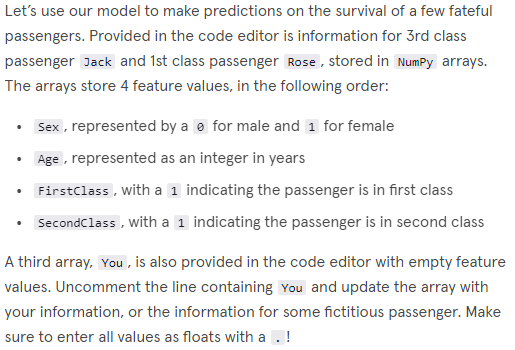

In [ ]:
# Sample passenger features
Jack = np.array([0.0,20.0,0.0,0.0])
Rose = np.array([1.0,17.0,1.0,0.0])
You = np.array([0.0,20,0.0,1.0])

Let's combine Jack, Rose, and You into a single NumPy array.

In [ ]:
combined_arrays = np.array([Jack,Rose,You])
print(combined_arrays)

[[ 0. 20.  0.  0.]
 [ 1. 17.  1.  0.]
 [ 0. 20.  0.  1.]]


Since our Logistic Regression model was trained on scaled feature data, we must also scale the feature data we are making predictions on. Using the StandardScaler object created earlier, apply its .transform() method to combined_arrays and save the result to sample_passengers.

We can then print sample_passengers to view the scaled features.

In [ ]:
sample_passengers = scaler.transform(combined_arrays)

In [ ]:
print(sample_passengers)

[[-0.73334642 -0.76427714 -0.56870034 -0.51662744]
 [ 1.36361202 -0.9905595   1.7583953  -0.51662744]
 [-0.73334642 -0.76427714 -0.56870034  1.93563082]]


Now let's make the prediction to see who survives...

In [ ]:
prediction = model.predict(sample_passengers)

In [ ]:
print(list(zip(['Jack','Rose','You'],prediction)))

[('Jack', 0), ('Rose', 1), ('You', 0)]


It seems like I could not survive.... Let's see the probabilities with the left one being death and the right being survival.

In [ ]:
print(model.predict_proba(sample_passengers))

[[0.8944327  0.1055673 ]
 [0.04826613 0.95173387]
 [0.68673261 0.31326739]]


**The end.**